<a href="https://colab.research.google.com/github/yethu-KL29/Polygon.Ai-Time-Series-Prediction/blob/main/galtech_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**

Develop a system that scrapes stock market data from the Polygon.io API, preprocesses it, and performs time series analysis using Support Vector Machines (SVM).

In [ ]:
# !pip install -U polygon-api-client <----- install the dependency

**Data Fetching using Polygon API**

In [ ]:
import requests
import pandas as pd

# Polygon.io API endpoint and your API key
api_key = "Your_API_key"
#for api key visit : https://polygon.io/


# Define the date range for the query (example: entire month of January 2023)
start_date = "2000-01-01"  # Replace with your desired start date
end_date = "2024-01-01"   #

# Create the URL dynamically based on the start and end dates
url = f"https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/{start_date}/{end_date}"

# Send the GET request to fetch the data
response = requests.get(url, params={"apiKey": api_key})

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract the results from the response
    results = data.get('results', [])

    # Create a dataframe from the extracted data
    df = pd.DataFrame(results)

    # Display the dataframe
    print(df)
else:
    print(f"Error fetching data: {response.status_code}")


              v        vw        o       c       h        l              t  \
0    80389400.0  149.7060  146.430  150.72  151.48  146.150  1668661200000   
1    74829573.0  151.1944  152.305  151.29  152.70  149.970  1668747600000   
2    58724070.0  148.4817  150.160  148.01  150.37  147.715  1669006800000   
3    51804132.0  149.1957  148.130  150.18  150.42  146.925  1669093200000   
4    58283895.0  150.7871  149.450  151.07  151.83  149.340  1669179600000   
..          ...       ...      ...     ...     ...      ...            ...   
275  37149570.0  194.1013  195.180  193.60  195.41  192.970  1703221200000   
276  28919310.0  193.1713  193.610  193.05  193.89  192.830  1703566800000   
277  48087681.0  192.5679  192.490  193.15  193.50  191.090  1703653200000   
278  34049898.0  193.9222  194.140  193.58  194.66  193.170  1703739600000   
279  42672148.0  192.5761  193.900  192.53  194.40  191.725  1703826000000   

          n  
0    563714  
1    514103  
2    504777  
3    40

# ***Data Preprocessing***

In [ ]:
df.shape

(280, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       280 non-null    float64
 1   vw      280 non-null    float64
 2   o       280 non-null    float64
 3   c       280 non-null    float64
 4   h       280 non-null    float64
 5   l       280 non-null    float64
 6   t       280 non-null    int64  
 7   n       280 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 17.6 KB


In [ ]:
#convert the timestamp to readbale date

df['date'] = pd.to_datetime(df['t'], unit='ms').dt.date
df.drop(columns=['t'] , inplace = True)

In [ ]:
df.head()

,v,vw,o,c,h,l,n,date
0,80389400.0,149.7060,146.430,150.72,151.48,146.150,563714,2022-11-17
1,74829573.0,151.1944,152.305,151.29,152.70,149.970,514103,2022-11-18
2,58724070.0,148.4817,150.160,148.01,150.37,147.715,504777,2022-11-21
3,51804132.0,149.1957,148.130,150.18,150.42,146.925,405185,2022-11-22
4,58283895.0,150.7871,149.450,151.07,151.83,149.340,444423,2022-11-23


In [ ]:

#checking is ther is any null values
df.isnull().sum()

,0
v,0
vw,0
o,0
c,0
h,0
l,0
n,0
date,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v       280 non-null    float64
 1   vw      280 non-null    float64
 2   o       280 non-null    float64
 3   c       280 non-null    float64
 4   h       280 non-null    float64
 5   l       280 non-null    float64
 6   n       280 non-null    int64  
 7   date    280 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 17.6+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Data Overview:
# The dataset consists of historical stock prices with the following key features:

# Open (o), Close (c), High (h), Low (l), Volume (vw) for each trading day.
# Additional features were engineered, including price change, log return, daily return, moving averages (7-day, 14-day, 30-day), and volatility (rolling standard deviation).

# Feature engineering (price change, log return, daily return, moving averages, etc.)
df['price_change'] = df['c'].diff()
df['log_return'] = np.log(df['c'] / df['c'].shift(1))
df['daily_return'] = df['c'].pct_change() * 100
df['ma_7'] = df['c'].rolling(window=7).mean()
df['ma_14'] = df['c'].rolling(window=14).mean()
df['ma_30'] = df['c'].rolling(window=30).mean()
df['volatility'] = df['daily_return'].rolling(window=7).std()


In [ ]:
df.head()

,v,vw,o,c,h,l,n,date,price_change,log_return,daily_return,ma_7,ma_14,ma_30,volatility
0,80389400.0,149.7060,146.430,150.72,151.48,146.150,563714,2022-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74829573.0,151.1944,152.305,151.29,152.70,149.970,514103,2022-11-18,0.57,0.003775,0.378185,NaN,NaN,NaN,NaN
2,58724070.0,148.4817,150.160,148.01,150.37,147.715,504777,2022-11-21,-3.28,-0.021919,-2.168022,NaN,NaN,NaN,NaN
3,51804132.0,149.1957,148.130,150.18,150.42,146.925,405185,2022-11-22,2.17,0.014555,1.466117,NaN,NaN,NaN,NaN
4,58283895.0,150.7871,149.450,151.07,151.83,149.340,444423,2022-11-23,0.89,0.005909,0.592622,NaN,NaN,NaN,NaN


In [ ]:
columns_to_fillna = ['price_change', 'log_return', 'daily_return', 'ma_7', 'ma_14', 'ma_30', 'volatility']
df[columns_to_fillna] = df[columns_to_fillna].fillna(df[columns_to_fillna].mean())


In [ ]:
df.head()

,v,vw,o,c,h,l,n,date,price_change,log_return,daily_return,ma_7,ma_14,ma_30,volatility
0,80389400.0,149.7060,146.430,150.72,151.48,146.150,563714,2022-11-17,0.149857,0.000878,0.097306,169.10732,169.052036,169.116254,1.28134
1,74829573.0,151.1944,152.305,151.29,152.70,149.970,514103,2022-11-18,0.570000,0.003775,0.378185,169.10732,169.052036,169.116254,1.28134
2,58724070.0,148.4817,150.160,148.01,150.37,147.715,504777,2022-11-21,-3.280000,-0.021919,-2.168022,169.10732,169.052036,169.116254,1.28134
3,51804132.0,149.1957,148.130,150.18,150.42,146.925,405185,2022-11-22,2.170000,0.014555,1.466117,169.10732,169.052036,169.116254,1.28134
4,58283895.0,150.7871,149.450,151.07,151.83,149.340,444423,2022-11-23,0.890000,0.005909,0.592622,169.10732,169.052036,169.116254,1.28134


In [ ]:
df.columns

Index(['v', 'vw', 'o', 'c', 'h', 'l', 'n', 'date', 'price_change',
       'log_return', 'daily_return', 'ma_7', 'ma_14', 'ma_30', 'volatility'],
      dtype='object')

# Model Development


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score , root_mean_squared_error
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define the target (predicting the closing price 'c' )
df.set_index('date', inplace=True)
X = df.drop(columns=['c'])  # Features
y = df['c']  # Target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM model for regression
svm_model = SVR(kernel='rbf')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and hyperparameters
best_svm_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'auto'}


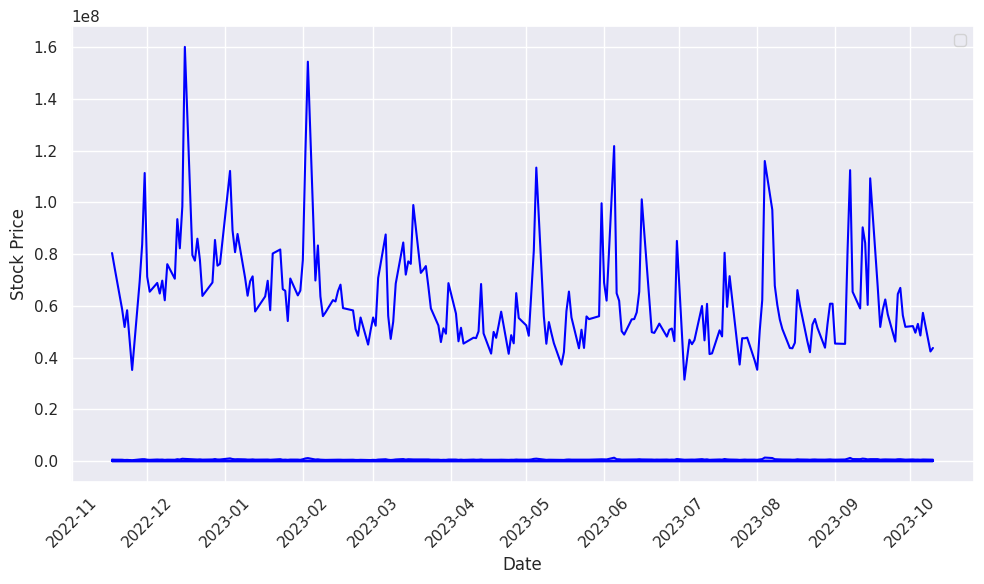

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a new figure
# Plot the X_train data
plt.figure(figsize=(10, 6))
plt.plot(X_train.index, X_train, color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y_test.index


Index([2023-10-11, 2023-10-12, 2023-10-13, 2023-10-16, 2023-10-17, 2023-10-18,
       2023-10-19, 2023-10-20, 2023-10-23, 2023-10-24, 2023-10-25, 2023-10-26,
       2023-10-27, 2023-10-30, 2023-10-31, 2023-11-01, 2023-11-02, 2023-11-03,
       2023-11-06, 2023-11-07, 2023-11-08, 2023-11-09, 2023-11-10, 2023-11-13,
       2023-11-14, 2023-11-15, 2023-11-16, 2023-11-17, 2023-11-20, 2023-11-21,
       2023-11-22, 2023-11-24, 2023-11-27, 2023-11-28, 2023-11-29, 2023-11-30,
       2023-12-01, 2023-12-04, 2023-12-05, 2023-12-06, 2023-12-07, 2023-12-08,
       2023-12-11, 2023-12-12, 2023-12-13, 2023-12-14, 2023-12-15, 2023-12-18,
       2023-12-19, 2023-12-20, 2023-12-21, 2023-12-22, 2023-12-26, 2023-12-27,
       2023-12-28, 2023-12-29],
      dtype='object', name='date')

In [ ]:

# Train the best model
best_svm_model.fit(X_train_scaled, y_train)

# Evaluate the model's performance on the test set
y_pred = best_svm_model.predict(X_test_scaled)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (MSE): {rmse}")

print(f"R² Score: {r2}")


Mean Squared Error (MSE): 3.0946211795746237
Root Mean Squared Error (MSE): 1.7591535406480652
R² Score: 0.9605998794209097


# **Visualisation**

Actual vs Predicted Stock Prices:

A line plot was created to compare the actual stock prices with the predicted prices. The graph showed how closely the predicted prices matched the actual stock prices over time, with a clear visual correlation.

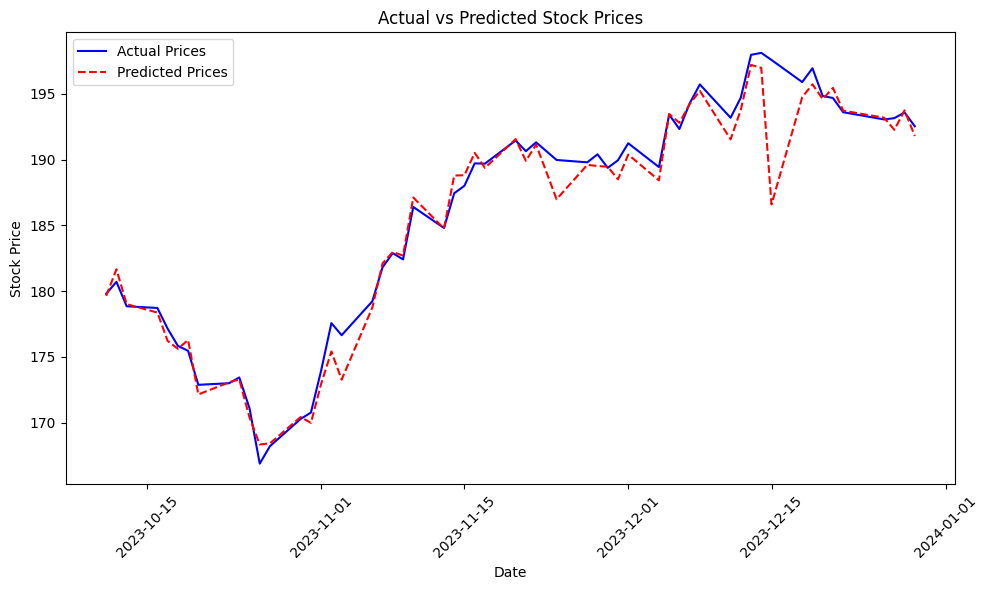

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a new figure
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='dashed')

# Add labels and title
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Residual Distribution:

A distribution plot was created to visualize the residuals (errors) between the actual and predicted prices. This helped assess the performance of the model and confirmed that the errors were evenly distributed around zero.

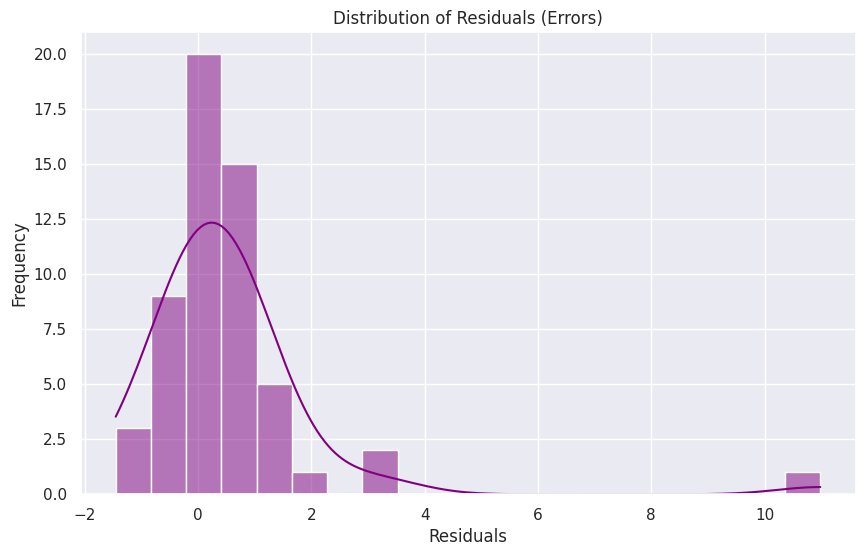

In [ ]:
# Calculate residuals (errors)
residuals = y_test - y_pred

# Create a distribution plot (Histogram + KDE)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)

# Add labels and title
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Pairplot
 The pairplot was included to observe the pairwise relationships between different features, which allowed us to better understand the distribution and correlations between them, and identify patterns that could inform model development.

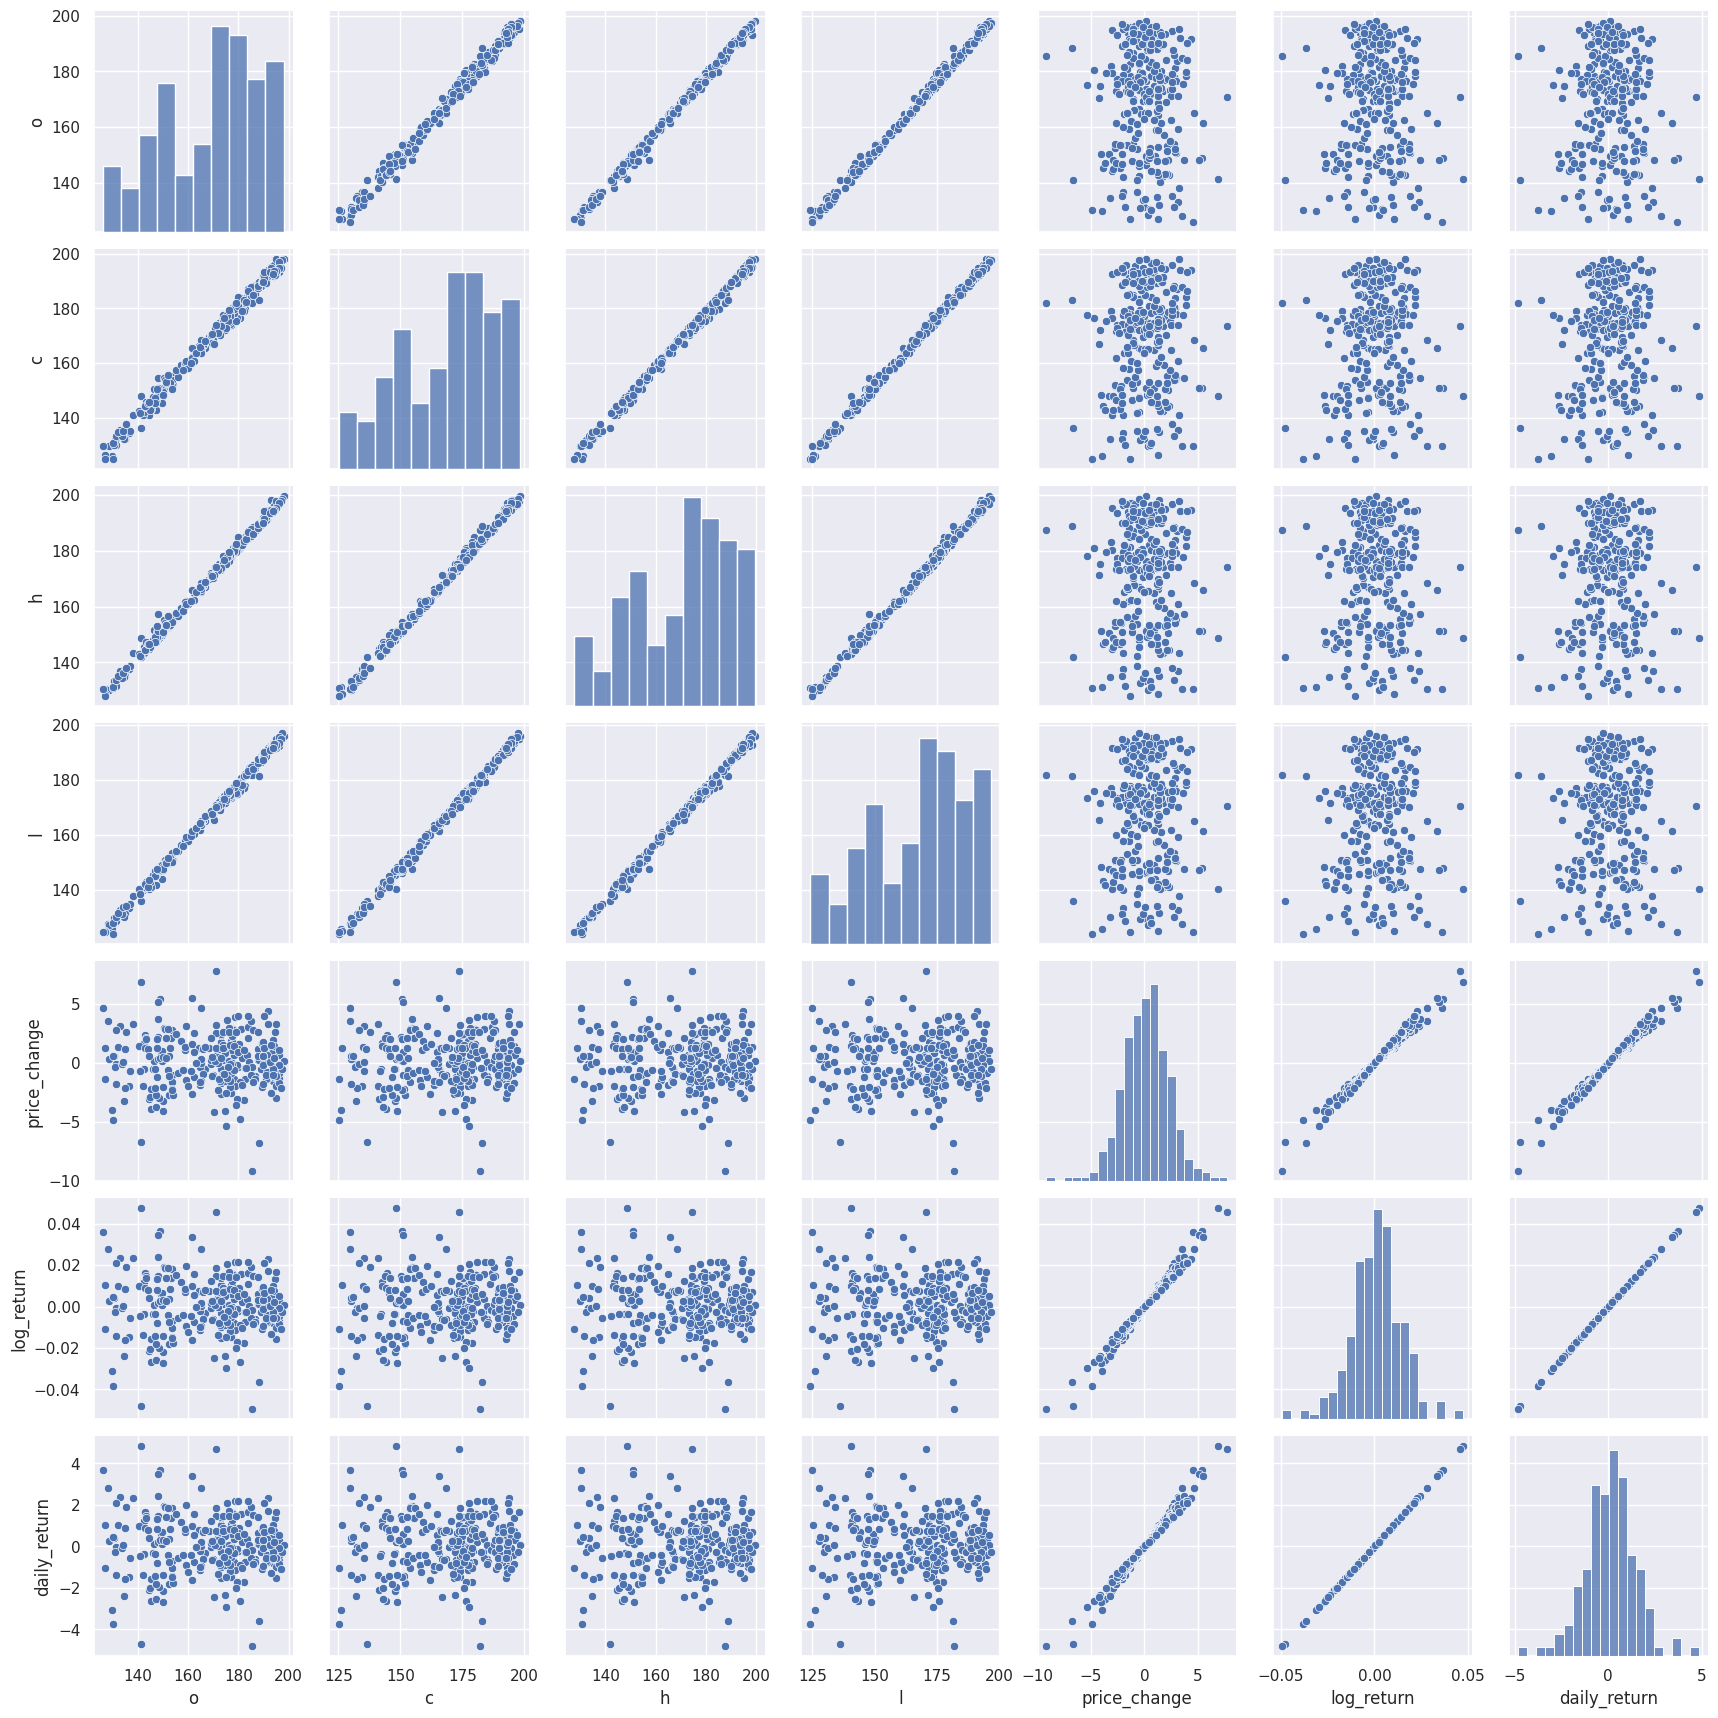

In [ ]:
# Pairplot to see the relationship between features
sns.pairplot(df[['o', 'c', 'h', 'l', 'price_change', 'log_return', 'daily_return']])

# Show the pairplot
plt.show()


Correlation Plot

The correlation plot was added to visualize the relationships between features, helping to identify which features are positively or negatively correlated, and highlighting potential redundancies in the data.



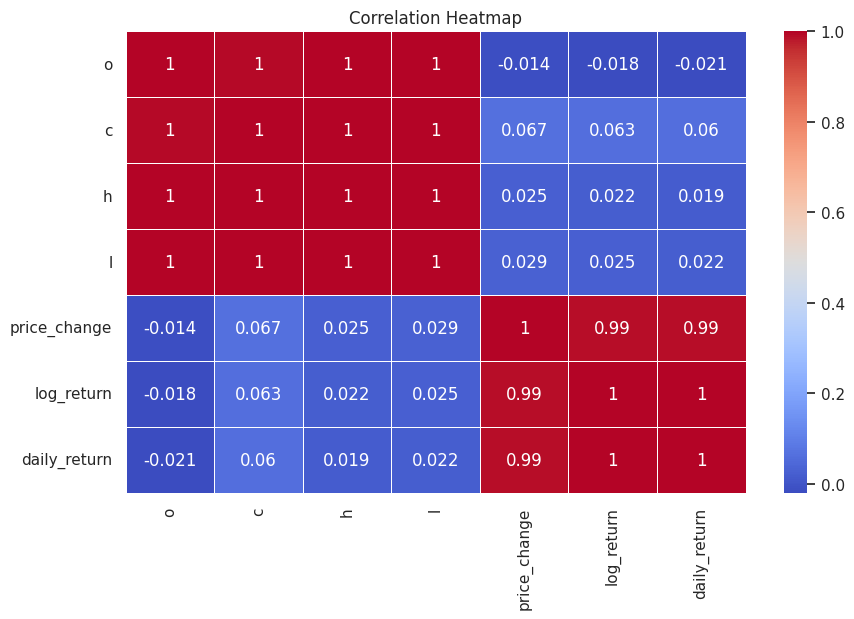

In [ ]:
# Compute the correlation matrix
corr_matrix = df[['o', 'c', 'h', 'l', 'price_change', 'log_return', 'daily_return']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and show the plot
plt.title('Correlation Heatmap')
plt.show()


## Provide a brief report with insights from the time series analysis and any patterns or trends observed.


# Data Preprocessing:

We first handled the feautures required and  missing values in the dataset by filling them with the mean of the respective columns.
Next, we applied StandardScaler to scale the features, as SVM models perform better when the data is normalized.
# Model Development:

We used the Support Vector Regression (SVR) model to predict stock prices. The SVR model was trained using a Radial Basis Function (RBF) kernel, which is well-suited for non-linear relationships in time series data.
Hyperparameters like C, epsilon, and gamma were tuned using GridSearchCV to find the best combination.
# Evaluation:

The performance of the model was evaluated using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). The R² score was also calculated to measure how well the model explained the variance in stock prices.


  
# Results:

R² Score: The model achieved an R² score of 0.96, meaning it explained 96% of the variance in stock prices, which indicates excellent accuracy.
MSE: The Mean Squared Error (MSE) was 3.09, suggesting a moderate error in the predictions.
RMSE: The Root Mean Squared Error (RMSE) was 1.76, showing that on average, the model's predictions were off by 1.76 units in terms of stock price.